# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies
from citipy import citipy
from config import api_key
from pprint import pprint
from scipy import stats
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

# Set lat and lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# Create empty lists to store values
lats_lngs = []
cities = []

# Generate random lats and lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Find closest cities to generated coordinates using citipy
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)
        
# Count number of cities generated
len(cities)

630

In [28]:
cities

['klaksvik',
 'busselton',
 'bolungarvik',
 'nalut',
 'camacha',
 'arman',
 'grindavik',
 'port alfred',
 'gondanglegi',
 'yellowknife',
 'altagracia de orituco',
 'saint george',
 'dzhebariki-khaya',
 'chuy',
 'te anau',
 'upernavik',
 'airai',
 'saint-augustin',
 'beyneu',
 'puerto ayora',
 'flinders',
 'arima',
 'floriano',
 'cherskiy',
 'iqaluit',
 'khotyn',
 'cayenne',
 'torbay',
 'mataura',
 'matara',
 'mount gambier',
 'porto walter',
 'merke',
 'new norfolk',
 'awka',
 'hermanus',
 'orchard homes',
 'vieste',
 'kapaa',
 'uthal',
 'bethel',
 'rikitea',
 'kaitangata',
 'dikson',
 'vanimo',
 'bredasdorp',
 'albany',
 'husavik',
 'vila',
 'mys shmidta',
 'college',
 'mehamn',
 'belmonte',
 'nikolskoye',
 'hasaki',
 'dien bien',
 'hobart',
 'saint-joseph',
 'vaini',
 'westport',
 'bluff',
 'hilo',
 'astoria',
 'atuona',
 'kaspiysk',
 'gat',
 'east london',
 'chernyshevskiy',
 'cape town',
 'quatre cocos',
 'ushuaia',
 'tiksi',
 'altea',
 'muroto',
 'lebu',
 'hirara',
 'novoagansk',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [30]:
response = requests.get(query_url + "London").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1601277183,
 'id': 2643743,
 'main': {'feels_like': 6.39,
          'humidity': 76,
          'pressure': 1012,
          'temp': 9.86,
          'temp_max': 12.22,
          'temp_min': 8.33},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1601272604,
         'sunset': 1601315117,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 3.6}}


In [39]:
# Retrieve data from all randomly generated cities
# Create empty lists to store data of cities
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set initial values of counters
count = 0
set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop over a list while keeping track of indexes
for index, city in enumerate(cities):
    count += 1
    if count == 51:
        count = 1
        set += 1
        time.sleep(5)
    print(f'Processing Record {count} of Set {set} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        # Append NaN values to ensure row counts match cities (for creating DataFrame)
        lat.append(np.nan)
        lon.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 1 | nalut
Processing Record 5 of Set 1 | camacha
Processing Record 6 of Set 1 | arman
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | gondanglegi
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | altagracia de orituco
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | dzhebariki-khaya
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | beyneu
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | nabire
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | sioux lookout
Processing Record 44 of Set 4 | saucillo
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | xuanhua
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | plettenberg bay
Processing Record 1 of Set 5 | conceicao do araguaia
Processing Record 2 of Set 5 | sharanga
Processing Record 3 of Set 5 | walvis bay
Processing Record 4 of Set 5 | tromso
Processing Record 5 of Set 5 | phalodi
Processing Record 6 of Set 5 | orange walk
Processing Record 7 of Set 5 | lieksa
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | vostok
Processing Record 10 of Set 5 | souillac
Processing Record 11 of Set 5 | sampit
Processing Record 12 of Set 5 | bilibino
Processing Record 13 of Set 5 | sirnak
Process

Processing Record 28 of Set 8 | ankang
Processing Record 29 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | plouzane
Processing Record 32 of Set 8 | kamiiso
Processing Record 33 of Set 8 | ejura
Processing Record 34 of Set 8 | san andres
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | gordeyevka
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | shahreza
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | ponta delgada
Processing Record 41 of Set 8 | el tigre
Processing Record 42 of Set 8 | krasnopavlivka
Processing Record 43 of Set 8 | kidal
Processing Record 44 of Set 8 | lesogorsk
Processing Record 45 of Set 8 | sawakin
Processing Record 46 of Set 8 | belaya gora
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | mogok
Processing Record 49 of Set 8 | mongoumba
Processing Record 50 of Set 8 | ellisras
Processing

Processing Record 18 of Set 12 | anderson
Processing Record 19 of Set 12 | manokwari
Processing Record 20 of Set 12 | nishihara
Processing Record 21 of Set 12 | yokadouma
Processing Record 22 of Set 12 | madras
Processing Record 23 of Set 12 | voloshka
Processing Record 24 of Set 12 | bagua grande
Processing Record 25 of Set 12 | karasjok
Processing Record 26 of Set 12 | goianapolis
Processing Record 27 of Set 12 | otane
Processing Record 28 of Set 12 | trincomalee
Processing Record 29 of Set 12 | amos
Processing Record 30 of Set 12 | sovetskaya gavan
Processing Record 31 of Set 12 | glendive
Processing Record 32 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 33 of Set 12 | majene
Processing Record 34 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 12 | rocha
Processing Record 36 of Set 12 | jiujiang
Processing Record 37 of Set 12 | pizarro
Processing Record 38 of Set 12 | rio de janeiro
Processing Record 39 of Set 12 | severnyy-kos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
# Place data into a DataFrame
city_weather_df = pd.DataFrame({"City": cities,
                               "Lat": lat,
                               "Lng": lon,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness": cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date": date})
# Drop null values
city_weather_df = city_weather_df.dropna()

# Export city data into a csv file
city_weather_df.to_csv("./output/city_weather_data.csv", index=False)

# Read into saved csv file
weather_df = pd.read_csv("./output/city_weather_data.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.23,-6.59,10.00,100.0,90.0,4.60,FO,1.601289e+09
1,busselton,-33.65,115.33,15.00,54.0,42.0,4.31,AU,1.601289e+09
2,nalut,30.33,10.85,33.87,16.0,76.0,6.08,LY,1.601289e+09
3,camacha,33.08,-16.33,22.00,68.0,75.0,6.70,PT,1.601289e+09
4,arman,59.70,150.17,6.75,88.0,66.0,1.46,RU,1.601289e+09
...,...,...,...,...,...,...,...,...,...
575,tonj,7.27,28.68,28.44,75.0,74.0,2.05,SS,1.601289e+09
576,umm lajj,25.02,37.27,39.37,23.0,0.0,3.29,SA,1.601289e+09
577,ivanovka,42.89,75.08,17.00,27.0,7.0,3.00,KG,1.601289e+09
578,laguna,38.42,-121.42,21.67,35.0,1.0,3.60,US,1.601289e+09


In [54]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.00000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.134448,20.250310,18.86169,69.456897,51.927586,3.603138,1.601289e+09
std,33.307922,91.906108,9.40711,21.956383,37.839242,2.362069,1.557996e+02
min,-54.800000,-175.200000,-11.09000,1.000000,0.000000,0.150000,1.601288e+09
25%,-8.282500,-63.420000,11.20250,56.750000,13.750000,1.907500,1.601289e+09
50%,22.185000,25.540000,20.00000,75.000000,57.000000,3.100000,1.601289e+09
75%,47.200000,102.335000,26.00000,86.000000,90.000000,5.032500,1.601289e+09
max,78.220000,179.320000,43.48000,100.000000,100.000000,13.770000,1.601289e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
# Check for cities with humidity over 100%
weather_df["Humidity"].sort_values()

513      1.0
335      8.0
277      9.0
341      9.0
322     10.0
       ...  
427    100.0
444    100.0
453    100.0
90     100.0
0      100.0
Name: Humidity, Length: 580, dtype: float64

There are no cities with humidity over 100% in our data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

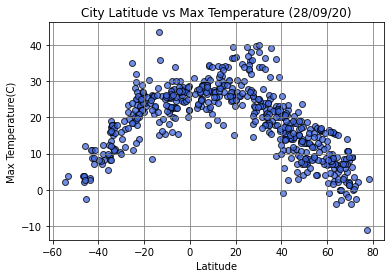

In [76]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title("City Latitude vs Max Temperature (28/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_temp.png")

# Show chart
plt.show()

## Latitude vs. Humidity Plot

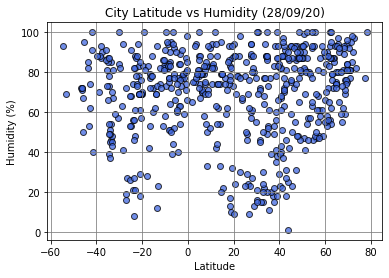

In [79]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title("City Latitude vs Humidity (28/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_humidity.png")

# Show chart
plt.show()

## Latitude vs. Cloudiness Plot

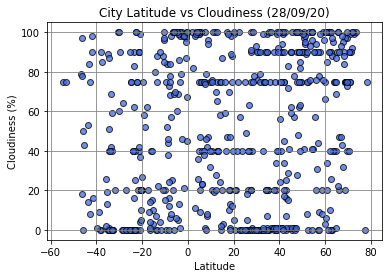

In [80]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title("City Latitude vs Cloudiness (28/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_cloudiness.png")

# Show chart
plt.show()

## Latitude vs. Wind Speed Plot

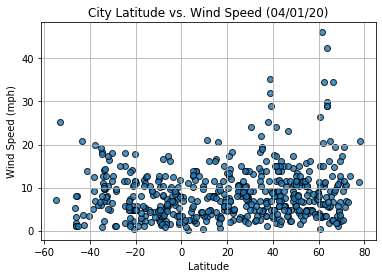

In [13]:
# Using pyplot to plot chart
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="royalblue", edgecolors="black", marker="o", alpha=0.75)
plt.title("City Latitude vs Wind Speed (28/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(b=True, which="major", axis="both", linestyle="-", color="grey")

# Save chart as png file
plt.savefig("./output/latitude_vs_cloudiness.png")

# Show chart
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


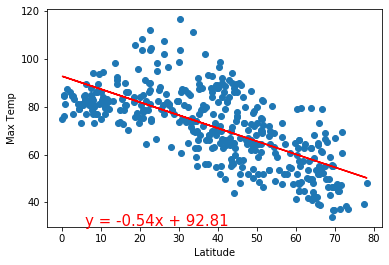

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


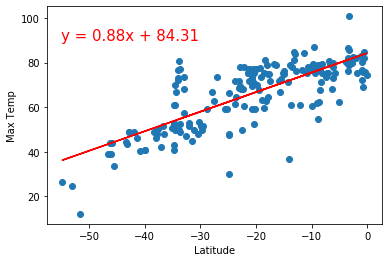

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


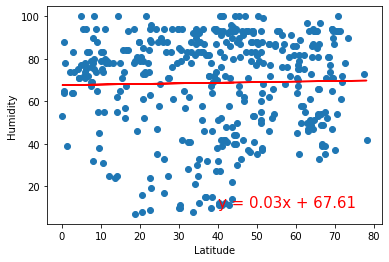

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


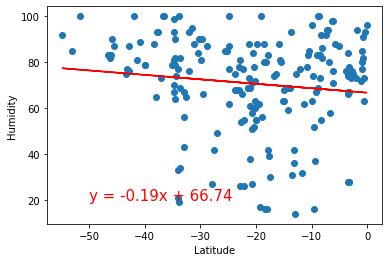

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


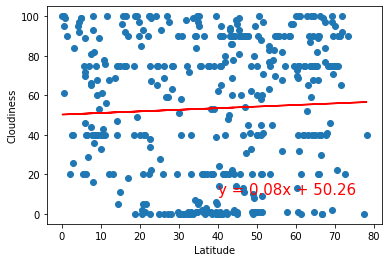

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


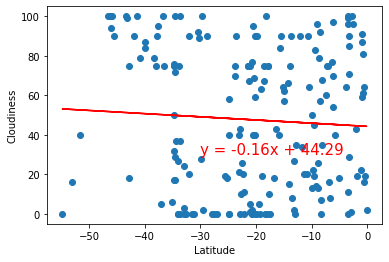

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


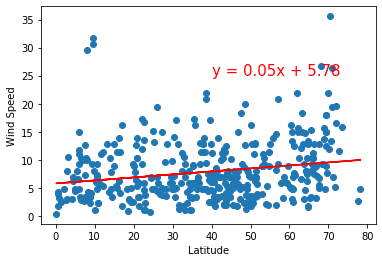

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


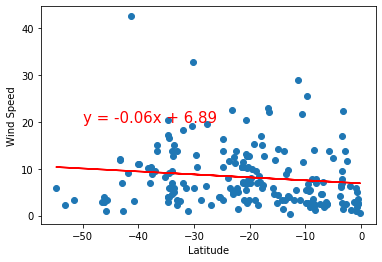